In [1]:
# Importing the packages/libraries I will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [6]:
# Importing data to the environment

df = pd.read_csv(r'C:\Users\Owner\Desktop\CSV\movies.csv')

In [62]:
# Looking at the data

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,2
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,2
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,2
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,3
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,2


In [10]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [11]:
# Controlling data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
# Changing data types for better results

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [63]:
df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,2
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,2
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,2
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,3
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,2


In [21]:
# Creating correct year column, due to casual incompatibility between "year" and "released date"

df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

In [64]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,2
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,2
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,2
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,3
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,2


In [65]:
# Sorting by 'gross'

df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,2
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,2
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,2
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,3
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,2


In [24]:
pd.set_option('display.max_rows', None)

In [66]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,2
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,2
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,2
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,3
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,2


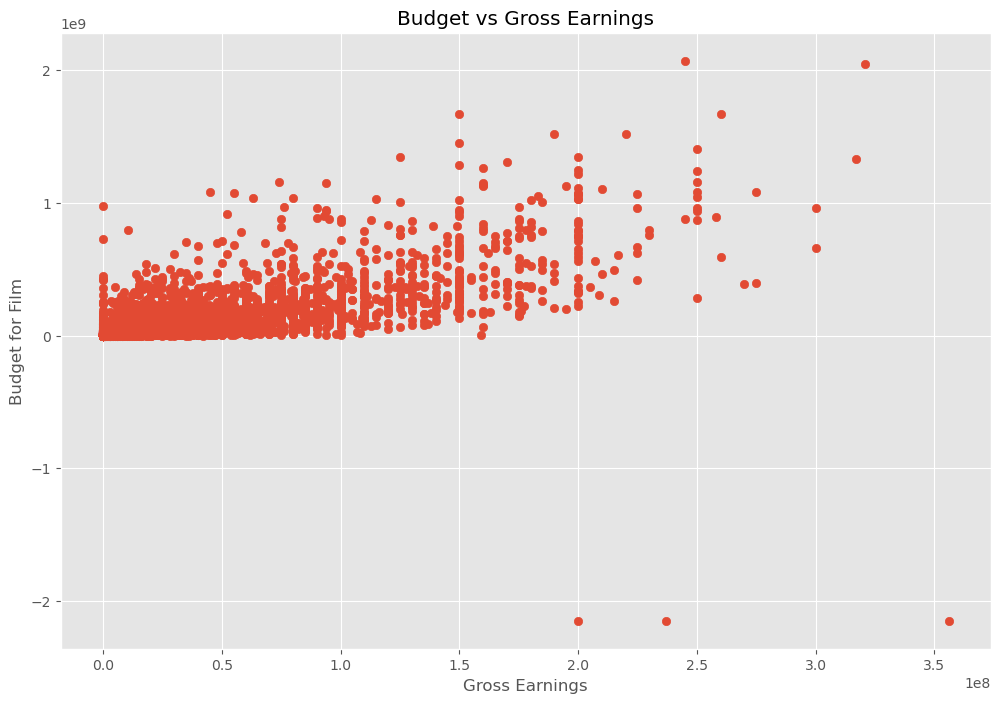

In [44]:
# Building a scatterplot comparing "budget" vs "gross" - MatPlotLib for a quick view

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()





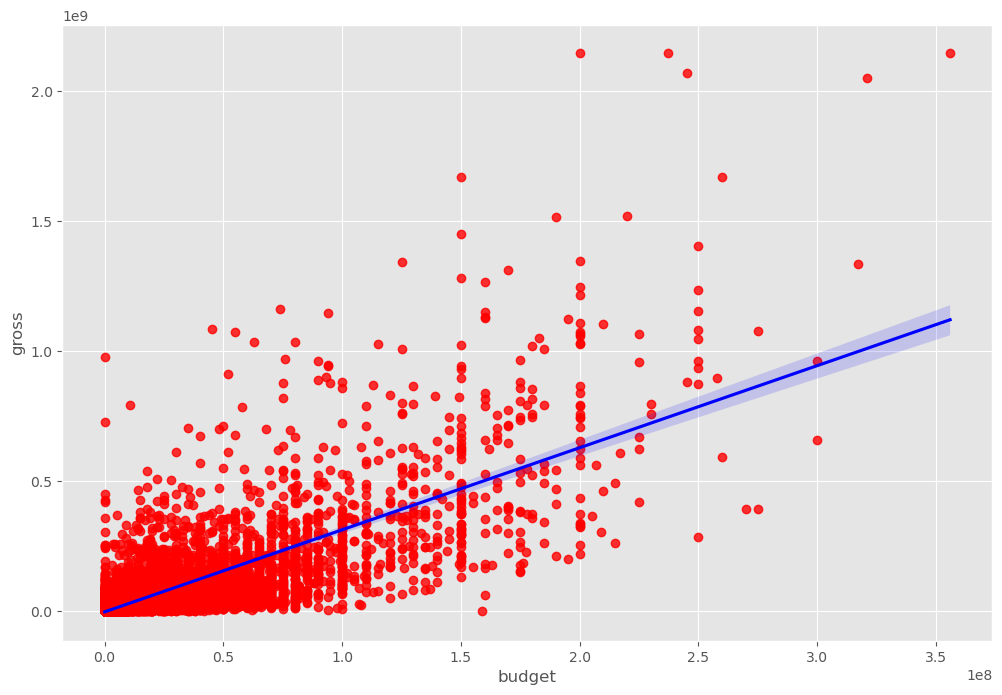

In [45]:
# Plotting "budget" vs gross" using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

df['gross'] = df['gross'].apply(lambda x: abs(x) if x < 0 else x)

In [46]:
correlation_matrix = df.corr(method = 'pearson',numeric_only = True)



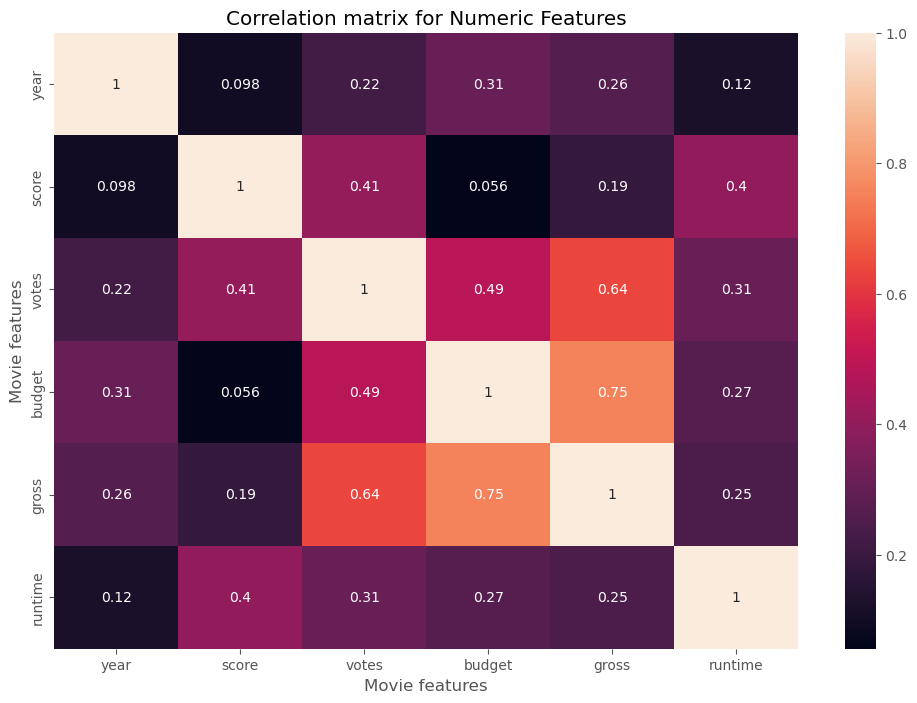

In [48]:
# Creating a "Correlation Matrix"

correlation_matrix = df.corr(method = 'pearson',numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [67]:
# For a quicker and broader view, we could define numbers to "company", f. ex.

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,2
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000,39754601,1812,95.0,2
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000,115229890,2281,133.0,2
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000,23402427,631,129.0,2
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000,108185706,883,127.0,3
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000,15795189,2272,100.0,2


In [53]:
df_numerized.corr(method='pearson')



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.008666,0.009211,0.010392,0.010071
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.096924,-0.032943,0.062145,0.008230
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.236812,-0.071067,-0.052711,-0.078972
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.264977,-0.010431,0.120811,0.990063
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.001944,-0.010474,0.000868,-0.006411
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.187530,0.001030,0.399451,0.103330
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.637010,0.133204,0.309212,0.218468
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014076,0.004404,0.017624,-0.019692
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022519,0.005646,-0.003511,-0.007400
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.002343,0.012442,0.010174,-0.025231


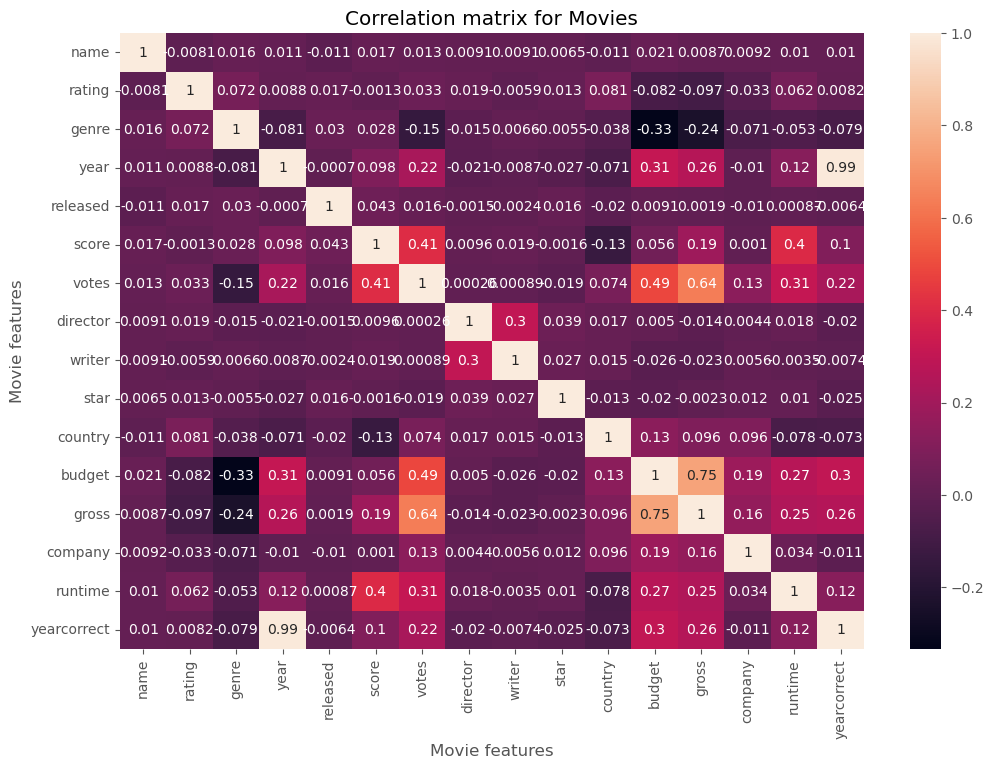

In [54]:
# And then look at the correlation between them

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [57]:
df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.008666,0.009211,0.010392,0.010071
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.096924,-0.032943,0.062145,0.008230
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.236812,-0.071067,-0.052711,-0.078972
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.264977,-0.010431,0.120811,0.990063
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.001944,-0.010474,0.000868,-0.006411
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.187530,0.001030,0.399451,0.103330
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.637010,0.133204,0.309212,0.218468
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014076,0.004404,0.017624,-0.019692
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022519,0.005646,-0.003511,-0.007400
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.002343,0.012442,0.010174,-0.025231


In [58]:
correlation_mat = df_numerized.corr()

corrs_pairs = correlation_mat.unstack()

corrs_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.008666
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010071
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [60]:
sorted_pairs = corrs_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.236812
gross        genre         -0.236812
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.096924
gross        rating        -0.096924
rating       budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
yearcorrect  genre         -0.078972
genre        yearcorrect   -0.078972
country      runtime       -0.078412
runtime      country       -0.078412
yearcorrect  country       -0.072682
country      yearcorrect   -0.072682
company      genre         -0.071067
genre        company       -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [61]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.637010
gross        votes          0.637010
             budget         0.754893
budget       gross          0.754893
year         yearcorrect    0.990063
yearcorrect  year           0.990063
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# In this case, "votes" and "budget" have the highest correlation with gross revenue 